In [1]:
import fasttext
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
model = fasttext.load_model('embeddings.bin')

In [3]:
model.get_nearest_neighbors('web')

[(0.7496828436851501, 'html'),
 (0.7464913129806519, "javascript's"),
 (0.7427344918251038, 'javascriptangular'),
 (0.7420363426208496, 'css'),
 (0.7415959239006042, 'webapplication'),
 (0.7414191365242004, 'xammp'),
 (0.7407330274581909, 'javascript'),
 (0.7401231527328491, 'htmljavascript'),
 (0.7394184470176697, 'codelgniter'),
 (0.7389074563980103, 'javascriptangularjs')]

In [4]:
jd = pd.read_csv('datasets/JD_dataset/Top30.csv')
jd

,Unnamed: 0,Unnamed: 0.1,Query,Description
0,10,10,Administrative Assistant,This Administrative Assistant position is resp...
1,35,35,Administrative Assistant,ADMINISTRATIVE ASSISTANT Part Time The West Or...
2,140,140,Administrative Assistant,Administrative Assistant - In Bus 26yrs Fashi...
3,214,214,Sales Representative,Are you ready for something new? Are you tired...
4,350,350,Customer Service Representative,Superior Staff Resources is currently seeking ...
...,...,...,...,...
72287,1117876,1117876,Business Analyst,ability construct complex sql statement analyz...
72288,1117877,1117877,Business Analyst,join u pursue disruptive new vision make machi...
72289,1117878,1117878,Business Analyst,duty high level independent decision making au...
72290,1117879,1117879,Business Analyst,crowdstrike leading provider next-generation e...


In [5]:
jd = jd[['Query', 'Description']]
jd

,Query,Description
0,Administrative Assistant,This Administrative Assistant position is resp...
1,Administrative Assistant,ADMINISTRATIVE ASSISTANT Part Time The West Or...
2,Administrative Assistant,Administrative Assistant - In Bus 26yrs Fashi...
3,Sales Representative,Are you ready for something new? Are you tired...
4,Customer Service Representative,Superior Staff Resources is currently seeking ...
...,...,...
72287,Business Analyst,ability construct complex sql statement analyz...
72288,Business Analyst,join u pursue disruptive new vision make machi...
72289,Business Analyst,duty high level independent decision making au...
72290,Business Analyst,crowdstrike leading provider next-generation e...


In [6]:
jd = jd.dropna()
jd

,Query,Description
0,Administrative Assistant,This Administrative Assistant position is resp...
1,Administrative Assistant,ADMINISTRATIVE ASSISTANT Part Time The West Or...
2,Administrative Assistant,Administrative Assistant - In Bus 26yrs Fashi...
3,Sales Representative,Are you ready for something new? Are you tired...
4,Customer Service Representative,Superior Staff Resources is currently seeking ...
...,...,...
72287,Business Analyst,ability construct complex sql statement analyz...
72288,Business Analyst,join u pursue disruptive new vision make machi...
72289,Business Analyst,duty high level independent decision making au...
72290,Business Analyst,crowdstrike leading provider next-generation e...


In [7]:
jd['Description'] = jd['Description'].str.replace(r'<.+?>', ' ') \
                                    .str.replace(r'\\n', ' ')   \
                                    .str.replace(r'\\t', '')  \
                                    .str.replace(r'\\r', ' ')   \
                                    .str.replace(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '') \
                                    .str.replace(r'[,!?;.:]+', '')   \
                                    .str.replace(r'[•●✓·➢⮚~&]', '')  \
                                    .str.replace(r'[\+\*=@#<>\(\)\[\]\^_/"-]+', ' ') \
                                    .str.replace(r'\s+', ' ')  \
                                    .str.lower()
jd

,Query,Description
0,Administrative Assistant,this administrative assistant position is resp...
1,Administrative Assistant,administrative assistant part time the west or...
2,Administrative Assistant,administrative assistant in bus 26yrs fashion ...
3,Sales Representative,are you ready for something new are you tired ...
4,Customer Service Representative,superior staff resources is currently seeking ...
...,...,...
72287,Business Analyst,ability construct complex sql statement analyz...
72288,Business Analyst,join u pursue disruptive new vision make machi...
72289,Business Analyst,duty high level independent decision making au...
72290,Business Analyst,crowdstrike leading provider next generation e...


In [8]:
jd['Query'].value_counts()

Administrative Assistant                                      4395
Customer Service Representative                               4200
Own Your Own Franchise!                                       3701
Sales Representative                                          3556
Mobile Tool Sales / Franchise Distributor                     3275
Retail Wireless Sales Consultant                              3194
Sales / Franchise                                             3120
Project Manager                                               2845
Staff Accountant                                              2834
Retail Sales Associate                                        2769
Business Analyst                                              2420
Sales / Customer Service – Part or Full time – Summer Work    2419
Sales Representative / Account Manager /  Customer Service    2412
Senior Accountant                                             2216
Jani-King Franchise Business Opportunity                      

In [9]:
select_titles = ['Physical Therapist', 'Restaurant Manager', 'Java Developer', 'Financial Analyst']
jd_select = jd[jd['Query'].isin(select_titles)]
jd_select

,Query,Description
6,Java Developer,as a member of the web and portal development...
7,Java Developer,hsi the department of commerce doc is seeking...
9,Financial Analyst,financial analyst perform portfolio analysis u...
11,Java Developer,application developer senior java summary thi...
18,Financial Analyst,as our manager fpa based in ca you will be re...
...,...,...
71875,Java Developer,epam systems inc is seeking java developers to...
71885,Restaurant Manager,karloff restaurant is seeking a candidate for ...
71889,Java Developer,monitis is looking for a java developer who wi...
71891,Financial Analyst,si holding is seeking a skilled and motivated ...


In [10]:
jd_select['vector'] = jd_select['Description'].map(lambda x: model.get_sentence_vector(x.lower()))
jd_select

<ipython-input-10-d2ffc47b8e9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jd_select['vector'] = jd_select['Description'].map(lambda x: model.get_sentence_vector(x.lower()))


,Query,Description,vector
6,Java Developer,as a member of the web and portal development...,"[0.02680166, -0.0046856795, -0.026990138, -0.0..."
7,Java Developer,hsi the department of commerce doc is seeking...,"[-0.010582047, 0.0149005735, 0.0137459, -0.031..."
9,Financial Analyst,financial analyst perform portfolio analysis u...,"[0.020069512, 0.020381106, 0.013574474, -0.022..."
11,Java Developer,application developer senior java summary thi...,"[0.037378483, 0.023201115, -0.0066809915, -0.0..."
18,Financial Analyst,as our manager fpa based in ca you will be re...,"[0.02128905, 0.024885438, -0.001489714, -0.049..."
...,...,...,...
71875,Java Developer,epam systems inc is seeking java developers to...,"[0.0028660775, -0.016396297, -0.017111149, -0...."
71885,Restaurant Manager,karloff restaurant is seeking a candidate for ...,"[0.025735095, 0.042990264, 0.0048025963, -0.05..."
71889,Java Developer,monitis is looking for a java developer who wi...,"[-0.02076919, -0.014332164, -0.06309861, -0.01..."
71891,Financial Analyst,si holding is seeking a skilled and motivated ...,"[-0.008593824, 0.038395006, -0.0021344237, -0...."


In [11]:
vectors = jd_select['vector'].values
vectors = np.stack(vectors)
vectors

array([[ 0.02680166, -0.00468568, -0.02699014, ...,  0.01893634,
         0.04209472, -0.07298651],
       [-0.01058205,  0.01490057,  0.0137459 , ...,  0.04611622,
         0.01055035, -0.11220215],
       [ 0.02006951,  0.02038111,  0.01357447, ...,  0.09139086,
         0.03306886, -0.13624552],
       ...,
       [-0.02076919, -0.01433216, -0.06309861, ...,  0.02167262,
         0.05035694, -0.11223347],
       [-0.00859382,  0.03839501, -0.00213442, ...,  0.02369175,
        -0.00065847, -0.11656076],
       [ 0.00589941, -0.00459191, -0.03017102, ...,  0.02494529,
         0.03237702, -0.09233226]], dtype=float32)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(2)

In [13]:
pca.fit(vectors)
vectors_2d = pca.transform(vectors)

print(vectors_2d.shape)
vectors_2d

(6804, 2)


array([[-0.13718508, -0.02417645],
       [-0.06073595,  0.00261585],
       [-0.01892225,  0.07794002],
       ...,
       [ 0.00650164, -0.11716898],
       [-0.01060608, -0.06794653],
       [-0.02364606, -0.09690355]], dtype=float32)

In [14]:
my_skills = ['unit test', 'programming', 'project', 'database design', 'networking']

my_skills_vec = [model.get_sentence_vector(x) for x in my_skills]
my_skills_vec = pca.transform(my_skills_vec)
my_skills_vec

array([[-0.25102806,  0.16336659],
       [-0.33032286, -0.08265215],
       [-0.2878804 ,  0.05919576],
       [-0.3962508 ,  0.02164637],
       [-0.02500389, -0.00748499]], dtype=float32)

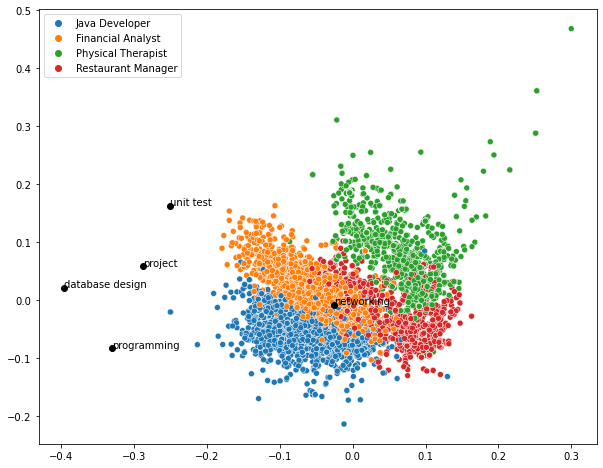

In [15]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=vectors_2d[:,0], y=vectors_2d[:,1], hue=jd_select['Query'].values)

plt.scatter(my_skills_vec[:,0], my_skills_vec[:,1], c='black')
for i,x in enumerate(my_skills):
    plt.annotate(x, my_skills_vec[i])

plt.scatter([0],[0])